In [1]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(X_train,y_train),(X_test ,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train,X_test = X_train / 255.0, X_test/255.0

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,'softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
r = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.2949 - acc: 0.9146 - val_loss: 0.1424 - val_acc: 0.9589
Epoch 2/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.1433 - acc: 0.9569 - val_loss: 0.1000 - val_acc: 0.9697
Epoch 3/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.1070 - acc: 0.9678 - val_loss: 0.0834 - val_acc: 0.9748
Epoch 4/10
60000/60000 [==============================] - 12s 207us/sample - loss: 0.0860 - acc: 0.9743 - val_loss: 0.0775 - val_acc: 0.9754
Epoch 5/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0726 - acc: 0.9770 - val_loss: 0.0763 - val_acc: 0.9779
Epoch 6/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0645 - acc: 0.9794 - val_loss: 0.0720 - val_acc: 0.9787
Epoch 7/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0569 - acc: 0.9815 - v

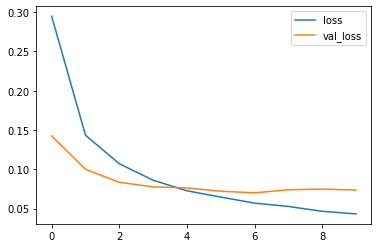

In [6]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

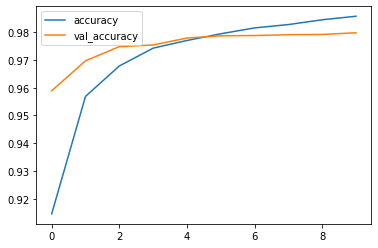

In [7]:
plt.plot(r.history['acc'],label='accuracy')
plt.plot(r.history['val_acc'],label='val_accuracy')
plt.legend()
plt.show()

In [8]:
print (model.evaluate(X_test,y_test))

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0735 - acc: 0.9798
[0.07350082176867873, 0.9798]


In [9]:
# Plot confusion matrix
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print ("Normalized Confusion Matrix")
    else:
        print ("Confusion Matrix, without normalization.")
    
    print (cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 0)
    plt.yticks(tick_marks,classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(
                j,i,format(cm[i,j],fmt),
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black'
                )
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

Confusion Matrix, without normalization.
[[ 967    1    1    1    1    2    5    1    1    0]
 [   0 1123    4    1    0    1    3    0    3    0]
 [   5    0 1007    2    2    0    2    2   12    0]
 [   0    0    5  991    0    3    1    5    4    1]
 [   0    0    2    0  966    0    8    1    1    4]
 [   2    0    0   11    1  870    3    1    4    0]
 [   1    2    1    1    3    6  944    0    0    0]
 [   2    2    5    2    1    0    0 1009    2    5]
 [   1    0    2    7    4    4    1    4  947    4]
 [   0    3    0    4   14    6    1    6    1  974]]


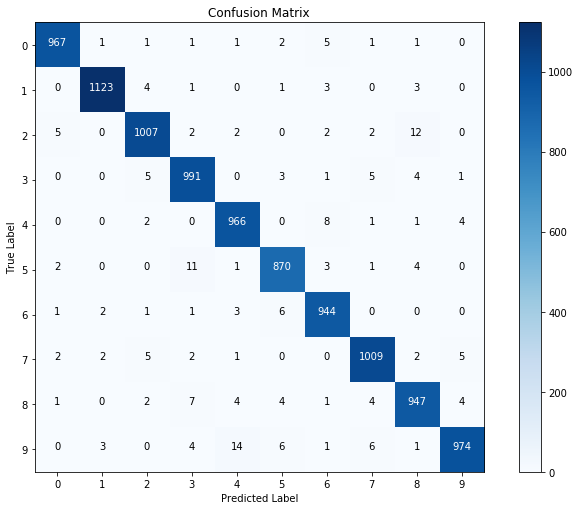

In [10]:
test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test,test)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cm,list(range(10)))

Normalized Confusion Matrix
[[9.86734694e-01 1.02040816e-03 1.02040816e-03 1.02040816e-03
  1.02040816e-03 2.04081633e-03 5.10204082e-03 1.02040816e-03
  1.02040816e-03 0.00000000e+00]
 [0.00000000e+00 9.89427313e-01 3.52422907e-03 8.81057269e-04
  0.00000000e+00 8.81057269e-04 2.64317181e-03 0.00000000e+00
  2.64317181e-03 0.00000000e+00]
 [4.84496124e-03 0.00000000e+00 9.75775194e-01 1.93798450e-03
  1.93798450e-03 0.00000000e+00 1.93798450e-03 1.93798450e-03
  1.16279070e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.95049505e-03 9.81188119e-01
  0.00000000e+00 2.97029703e-03 9.90099010e-04 4.95049505e-03
  3.96039604e-03 9.90099010e-04]
 [0.00000000e+00 0.00000000e+00 2.03665988e-03 0.00000000e+00
  9.83706721e-01 0.00000000e+00 8.14663951e-03 1.01832994e-03
  1.01832994e-03 4.07331976e-03]
 [2.24215247e-03 0.00000000e+00 0.00000000e+00 1.23318386e-02
  1.12107623e-03 9.75336323e-01 3.36322870e-03 1.12107623e-03
  4.48430493e-03 0.00000000e+00]
 [1.04384134e-03 2.08768267e-0

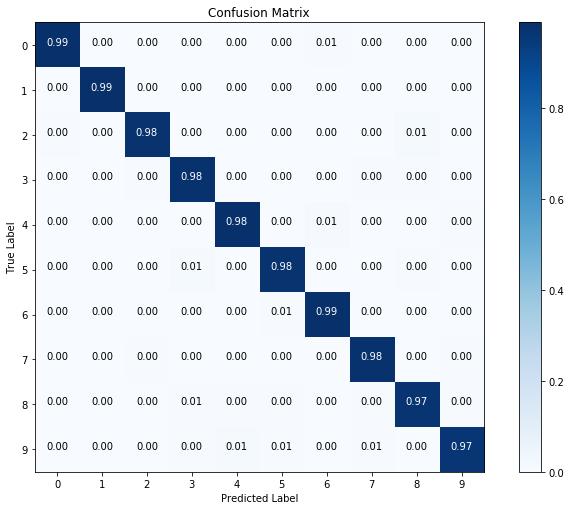

In [11]:
test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test,test)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cm,list(range(10)),True)